In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('./datasets/black_friday_sales_train.csv')

In [3]:
data_backup = data.copy()

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
set(data['Age'])

{'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'}

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Dealing with missing values

In [7]:
prod_categories = data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']]

In [8]:
prod_categories = prod_categories.drop_duplicates()

In [9]:
prod_categories.sort_values(['Product_Category_1', 'Product_Category_2', 'Product_Category_3'])

,Product_Category_1,Product_Category_2,Product_Category_3
112,1,2.0,3.0
95,1,2.0,4.0
13,1,2.0,5.0
64,1,2.0,6.0
342,1,2.0,8.0
420,1,2.0,9.0
718,1,2.0,11.0
76,1,2.0,13.0
235,1,2.0,14.0
65,1,2.0,15.0


In [10]:
data.iloc[1734]

User_ID                         1000278
Product_ID                    P00342042
Gender                                M
Age                               46-50
Occupation                           18
City_Category                         C
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category_1                   11
Product_Category_2                   15
Product_Category_3                   16
Purchase                           4680
Name: 1734, dtype: object

In [11]:
data.iloc[319]

User_ID                         1000053
Product_ID                    P00246742
Gender                                M
Age                               26-35
Occupation                            0
City_Category                         B
Stay_In_Current_City_Years            1
Marital_Status                        0
Product_Category_1                   11
Product_Category_2                   15
Product_Category_3                  NaN
Purchase                           1629
Name: 319, dtype: object

Both of the products belong to category 11 and sub-category 15. However, it is impossible to infer what it is 2nd sub-category of the second product. 

All missing values in columns _Product_Category_2_ and _Product_Category_3_ will be replaced with 0.

In [12]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
data.fillna(0, inplace=True)

In [14]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


## Exploratory Data Analysis

In [16]:
purchase_by_factor = {}
for c in data.columns[2:-1]:
    purchase_by_factor[c] = data.groupby(c)['Purchase'].sum()

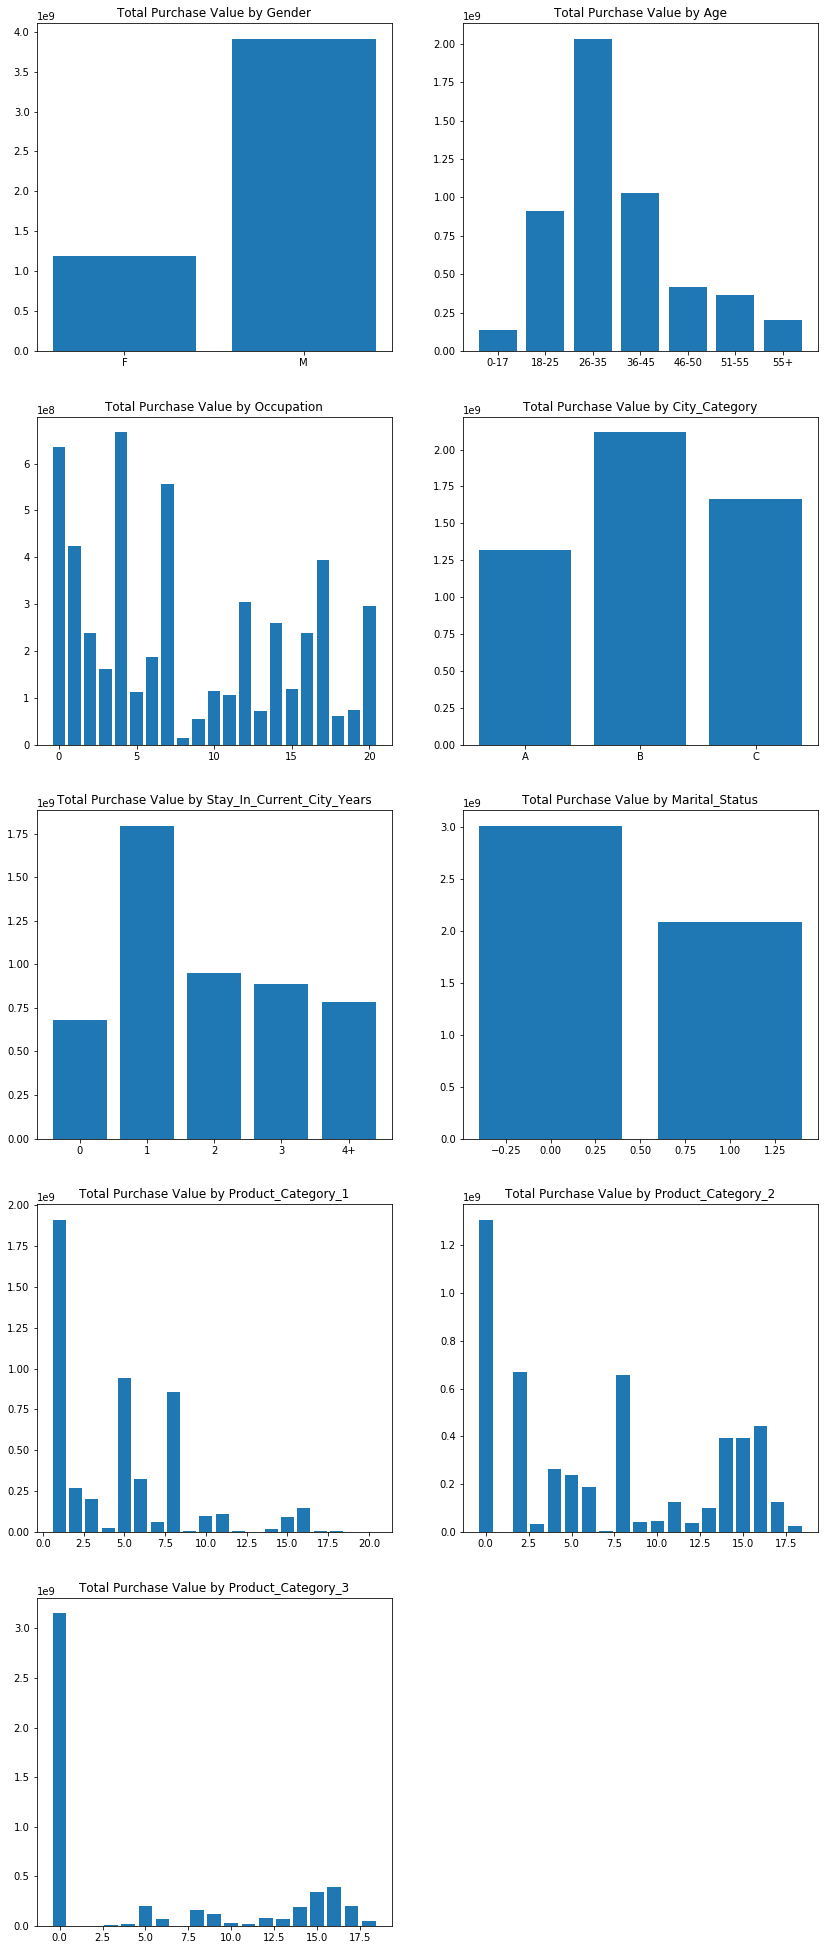

In [17]:
i = 1
plt.figure(figsize=(14, 35))
for c, p in purchase_by_factor.items():
    plt.subplot(5, 2, i)
    i += 1
    plt.bar(p.index, p.values)
    plt.title('Total Purchase Value by {}'.format(c))

Text(0.5, 1.0, 'Distribution of purchase values')

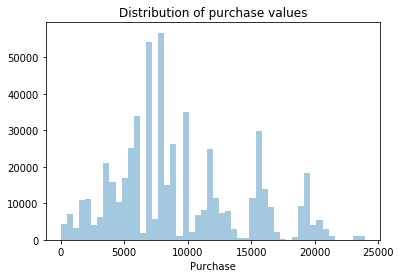

In [18]:
sns.distplot(data['Purchase'], kde=False)
plt.title('Distribution of purchase values')

Text(0.5, 1.0, 'Purchase values for each product category')

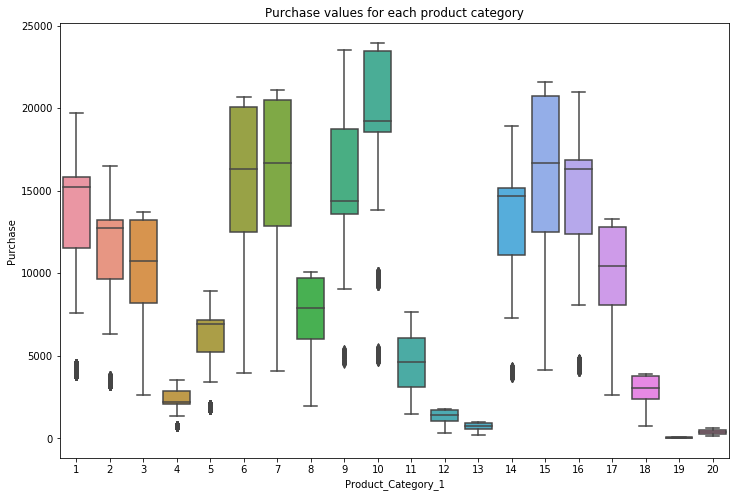

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot('Product_Category_1', 'Purchase', data=data)
plt.title('Purchase values for each product category')

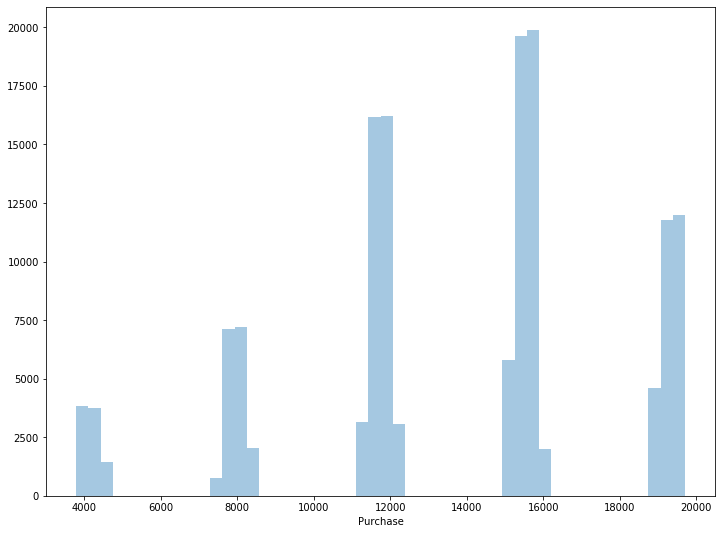

In [20]:
plt.figure(figsize=(12, 5))
sns.distplot(data[data['Product_Category_1'] == 1]['Purchase'], kde=False)

In [21]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [22]:
data['Log_Purchase'] = np.log(data['Purchase'])

__Reminder!__ Think what to do with clustering in Purchase columns.

In [23]:
encoder = LabelEncoder()

In [24]:
data_0 = data.copy()

In [25]:
data_0.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Log_Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,9.032409
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,9.629051
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,7.259820
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,6.963190
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.983314


In [26]:
data_0.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [27]:
data_0['Gender'] = encoder.fit_transform(data_0['Gender'])

In [28]:
data_0['Age'] = encoder.fit_transform(data_0['Age'])
data_0['City_Category'] = encoder.fit_transform(data_0['City_Category'])
data_0['Stay_In_Current_City_Years'] = encoder.fit_transform(data_0['Stay_In_Current_City_Years'])

In [29]:
data_0.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Log_Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370,9.032409
1,0,0,10,0,2,0,1,6.0,14.0,15200,9.629051
2,0,0,10,0,2,0,12,0.0,0.0,1422,7.259820
3,0,0,10,0,2,0,12,14.0,0.0,1057,6.963190
4,1,6,16,2,4,0,8,0.0,0.0,7969,8.983314


In [32]:
x = data_0.drop(['Purchase', 'Log_Purchase'], axis=1)

In [33]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,0.0,0.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,0.0,0.0
3,0,0,10,0,2,0,12,14.0,0.0
4,1,6,16,2,4,0,8,0.0,0.0


In [34]:
y = data_0['Purchase']

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Decision Tree Regressor

In [37]:
dt_depths = [5, 10, 15, 20]

In [38]:
dt_scores = []
for d in dt_depths:
    xgb = XGBRegressor()
    dt = DecisionTreeRegressor(max_depth=d)
    dt_scores.append(np.sqrt(-cross_val_score(dt, x, y, scoring='neg_mean_squared_error', cv=10, n_jobs=4)).mean())

In [39]:
dt_scores

[3413.5709350502075, 2964.034703685914, 3000.153036430306, 3164.7416256333777]

Text(0.5, 0, 'Decision Tree Depth')

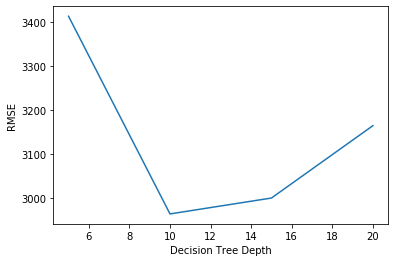

In [46]:
plt.plot(dt_depths, dt_scores)
plt.ylabel('RMSE')
plt.xlabel('Decision Tree Depth')

### Gradient Boost Regressor

In [ ]:
gb_depths = [3, 4]

In [ ]:
gb_scores = []
for d in gb_depths:
    gb = GradientBoostingRegressor(max_depth=d, learning_rate=0.3)
    gb_scores.append(np.sqrt(-cross_val_score(gb, x, y, scoring='neg_mean_squared_error', cv=3, n_jobs=2)).mean())

In [ ]:
gb_scores

In [ ]:
plt.plot(gb_depths, gb_scores)
plt.ylabel('RMSE')
plt.xlabel('Gradient Boost Tree Depth')

### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=20)

In [ ]:
rf_scores = np.sqrt(-cross_val_score(rf, x, y, scoring='neg_mean_squared_error'), cv=10, n_jobs=4)